In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv("heart.csv")

# Split into features and target
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
!pip install graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 438.5 kB/s eta 0:00:00a 0:00:01


In [8]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Train Decision Tree
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# Export tree to DOT format
dot_data = export_graphviz(
    dt_model,
    out_file=None,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True,
    special_characters=True
)

# Visualize
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png", cleanup=True)  # saves as decision_tree.png
graph.view()

'decision_tree.pdf'

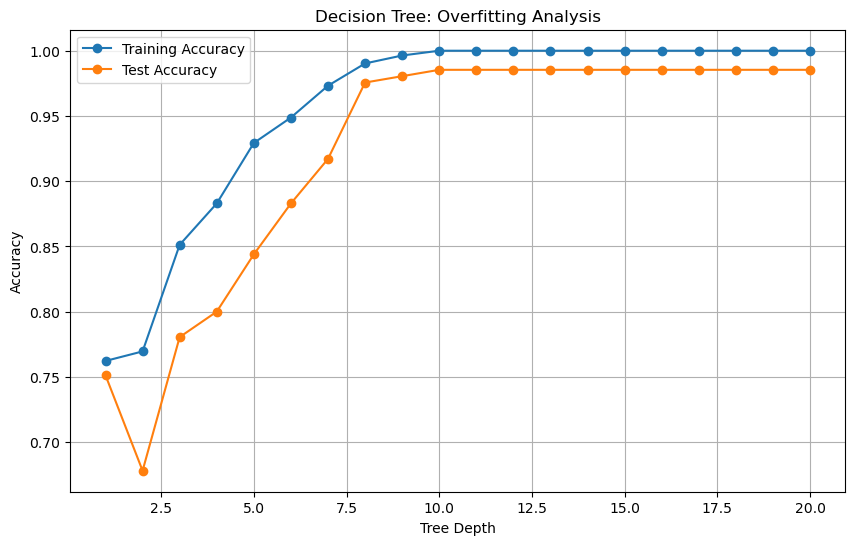

In [10]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

depths = range(1, 21)
train_accuracies = []
test_accuracies = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    train_accuracies.append(model.score(X_train, y_train))
    test_accuracies.append(model.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Overfitting Analysis')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Compare accuracy
print("Decision Tree Test Accuracy:", dt_model.score(X_test, y_test))
print("Random Forest Test Accuracy:", rf_model.score(X_test, y_test))

Decision Tree Test Accuracy: 0.8
Random Forest Test Accuracy: 0.9853658536585366


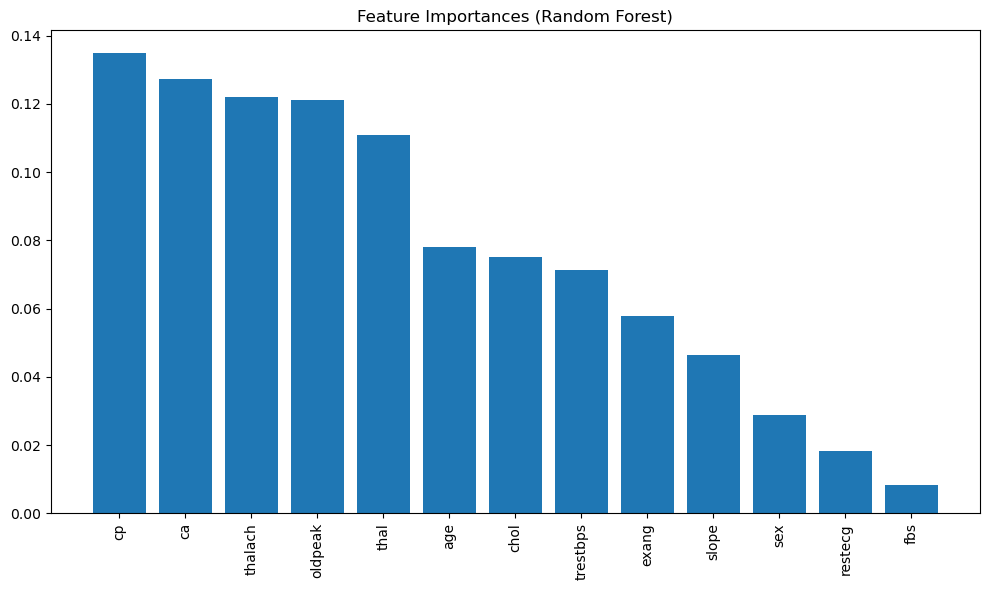

In [14]:
import numpy as np

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [16]:
from sklearn.model_selection import cross_val_score

rf_cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("Random Forest Cross-Validation Accuracy (5-fold):")
print("Scores:", rf_cv_scores)
print("Mean Accuracy:", rf_cv_scores.mean())

Random Forest Cross-Validation Accuracy (5-fold):
Scores: [1.         1.         1.         1.         0.98536585]
Mean Accuracy: 0.9970731707317073
